In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [32]:
filename = 'RT_80'
df = pd.read_csv('./{}_simulation.csv'.format(filename))
df['app_server_utilization'] = df['app_server_utilization'].apply(lambda x: 1 if x>1 else x)
df['db_server_utlization'] = df['db_server_utlization'].apply(lambda x: 1 if x>1 else x)
num_clients  = np.array(df['num_clients'])

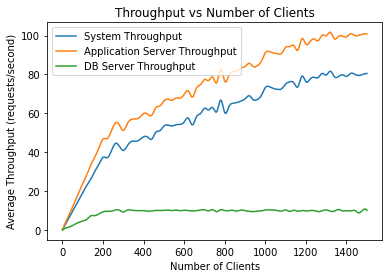

In [23]:
# average throughput
system_throughput  = np.array(df['system_throughput'])
app_server_throughput  = np.array(df['app_server_throughput'])
db_server_throughput  = np.array(df['db_server_throughput'])

system_throughput_spline = make_interp_spline(num_clients, system_throughput)
app_server_throughput_spline = make_interp_spline(num_clients, app_server_throughput)
db_server_throughput_spline = make_interp_spline(num_clients, db_server_throughput)

X_ = np.linspace(num_clients.min(), num_clients.max(), 500)
system_throughput_Y_ = system_throughput_spline(X_)
app_server_throughput_Y_ = app_server_throughput_spline(X_)
db_server_throughput_Y_ = db_server_throughput_spline(X_)

# Plotting the Graph
plt.plot(X_, system_throughput_Y_, label="System Throughput")
plt.plot(X_, app_server_throughput_Y_, label="Application Server Throughput")
plt.plot(X_, db_server_throughput_Y_, label="DB Server Throughput")
plt.title("Throughput vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Average Throughput (requests/second)")
plt.legend()
plt.savefig("./{}/throughput_curve.jpg".format(filename), bbox_inches="tight")
plt.show()

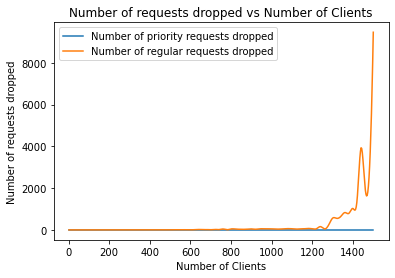

In [24]:
#number of requests dropped
priority_requests_dropped  = np.array(df['priority_requests_dropped'])
regular_requests_dropped  = np.array(df['regular_requests_dropped'])

priority_requests_dropped_spline = make_interp_spline(num_clients, priority_requests_dropped)
regular_requests_dropped_spline = make_interp_spline(num_clients, regular_requests_dropped)

X_ = np.linspace(num_clients.min(), num_clients.max(), 500)
priority_requests_dropped_Y_ = priority_requests_dropped_spline(X_)
regular_requests_dropped_Y_ = regular_requests_dropped_spline(X_)

# Plotting the Graph
plt.plot(X_, priority_requests_dropped_Y_, label="Number of priority requests dropped")
plt.plot(X_, regular_requests_dropped_Y_, label="Number of regular requests dropped")
plt.title("Number of requests dropped vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Number of requests dropped")
plt.legend()
plt.savefig("./{}/requests_dropped_curve.jpg".format(filename), bbox_inches="tight")
plt.show()

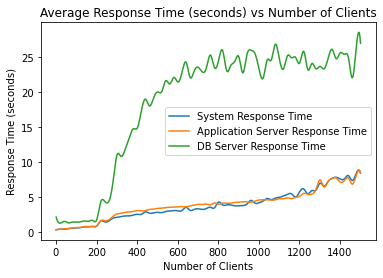

In [25]:
#average response time
system_average_response_time  = np.array(df['system_average_response_time'])
app_server_average_response_time  = np.array(df['app_server_average_response_time'])
db_server_average_response_time  = np.array(df['db_server_average_response_time'])

system_average_response_time_spline = make_interp_spline(num_clients, system_average_response_time)
app_server_average_response_time_spline = make_interp_spline(num_clients, app_server_average_response_time)
db_server_average_response_time_spline = make_interp_spline(num_clients, db_server_average_response_time)

X_ = np.linspace(num_clients.min(), num_clients.max(), 500)
system_average_response_time_Y_ = system_average_response_time_spline(X_)
app_server_average_response_time_Y_ = app_server_average_response_time_spline(X_)
db_server_average_response_time_Y_ = db_server_average_response_time_spline(X_)

# Plotting the Graph
plt.plot(X_, system_average_response_time_Y_, label="System Response Time")
plt.plot(X_, app_server_average_response_time_Y_, label="Application Server Response Time")
plt.plot(X_, db_server_average_response_time_Y_, label="DB Server Response Time")
plt.title("Average Response Time (seconds) vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Response Time (seconds)")
plt.legend()
plt.savefig("./{}/response_time_curve.jpg".format(filename), bbox_inches="tight")
plt.show()

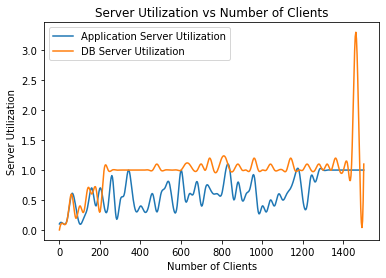

In [26]:
#core utilization
app_server_utilization  = np.array(df['app_server_utilization'])
db_server_utilization  = np.array(df['db_server_utlization'])

app_server_utilization_spline = make_interp_spline(num_clients, app_server_utilization)
db_server_utilization_spline = make_interp_spline(num_clients, db_server_utilization)

X_ = np.linspace(num_clients.min(), num_clients.max(), 500)
app_server_utilization_spline_Y_ = app_server_utilization_spline(X_)
db_server_utilization_spline_Y_ = db_server_utilization_spline(X_)

# Plotting the Graph
plt.plot(X_, app_server_utilization_spline_Y_, label="Application Server Utilization")
plt.plot(X_, db_server_utilization_spline_Y_, label="DB Server Utilization")
plt.title("Server Utilization vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Server Utilization")
plt.legend()
plt.savefig("./{}/server_utilization_curve.jpg".format(filename), bbox_inches="tight")
plt.show()

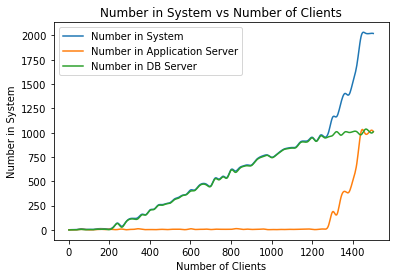

In [27]:
#number of requests in the system
number_in_system  = np.array(df['number_in_system'])
number_in_app_server  = np.array(df['number_in_app_server'])
number_in_db_server  = np.array(df['number_in_db_app_server'])

number_in_system_spline = make_interp_spline(num_clients, number_in_system)
number_in_app_server_spline = make_interp_spline(num_clients, number_in_app_server)
number_in_db_server_spline = make_interp_spline(num_clients, number_in_db_server)

X_ = np.linspace(num_clients.min(), num_clients.max(), 500)
number_in_system_spline_Y_ = number_in_system_spline(X_)
number_in_app_server_spline_Y_ = number_in_app_server_spline(X_)
number_in_db_server_spline_Y_ = number_in_db_server_spline(X_)

# Plotting the Graph
plt.plot(X_, number_in_system_spline_Y_, label="Number in System")
plt.plot(X_, number_in_app_server_spline_Y_, label="Number in Application Server")
plt.plot(X_, number_in_db_server_spline_Y_, label="Number in DB Server")
plt.title("Number in System vs Number of Clients")
plt.xlabel("Number of Clients")
plt.ylabel("Number in System")
plt.legend()
plt.savefig("./{}/number_in_system_curve.jpg".format(filename), bbox_inches="tight")
plt.show()